In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
def plot_acc_curves(acclist, title, botlim = 0, toplim = 1):
    
    plt.figure(figsize=(10, 7))
    plt.suptitle(title,fontsize=20)
    #plt.subplot(211)
    plt.xlabel('Round',fontsize=14)

    plt.ylabel('Accuracy',fontsize=14)
    plt.ylim(bottom=botlim,top= toplim)
    for al in acclist:
        eporange = np.arange(len(list(acclist[al]))+1)
        thelist = np.insert(acclist[al],0,0)
        plt.plot(eporange, thelist , '.-', label=str(al), alpha=50)

    
    plt.legend(loc='lower right',fontsize=14)
    plt.show()



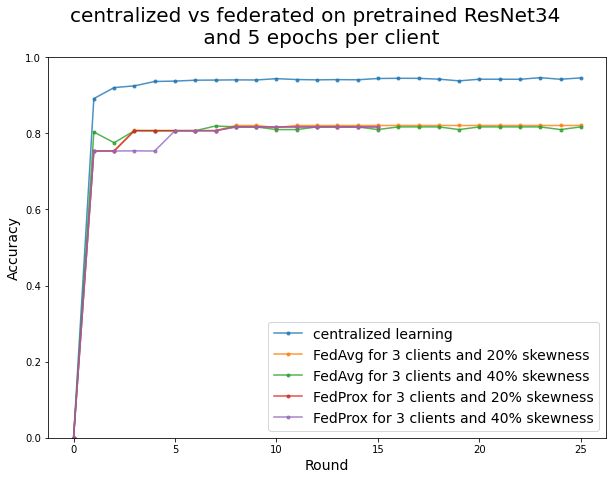

In [22]:

resdata1 = np.genfromtxt('centralised_acc&loss_for_resnet34_with_1_clients_202.csv',delimiter=',')
resdata2 = np.genfromtxt('fedavg_acc&loss_for_resnet34_with_3_clients_202.csv',delimiter=',')
resdata3 = np.genfromtxt('fedavg_acc&loss_for_resnet34_with_3_clients_402.csv',delimiter=',')

acc_dic ={"centralized learning" : resdata1[1,:],
          "FedAvg for 3 clients and 20% skewness": resdata2[1,:],
          "FedAvg for 3 clients and 40% skewness": resdata3[1,:],
         "FedProx for 3 clients and 20% skewness": np.genfromtxt('FedProx_acc&loss_for_resnet34_with_3_clients_20_clientsepox_5_vsplit_0.2_lr_0.001_ce_5.csv',delimiter=',')[1,:],
          "FedProx for 3 clients and 40% skewness": np.genfromtxt('FedProx_acc&loss_for_resnet34_with_3_clients_40_clientsepox_5_vsplit_0.2_lr_0.001_ce_5.csv',delimiter=',')[1,:]}
    
plot_acc_curves(acc_dic,'centralized vs federated on pretrained ResNet34 \n and 5 epochs per client')

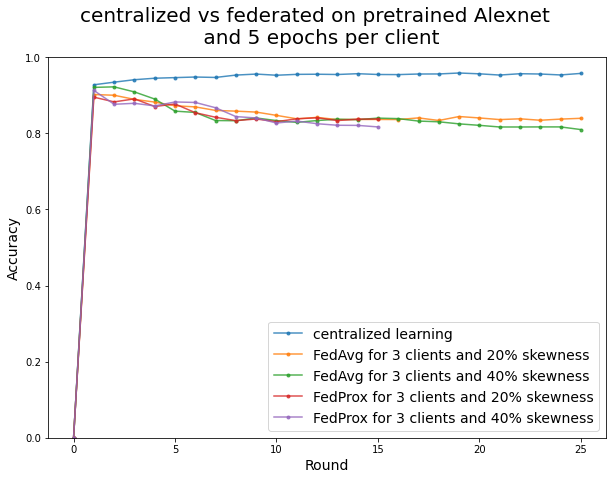

In [18]:
acc_dic2 ={"centralized learning" : np.genfromtxt('centralised_acc&loss_for_alexnet_with_1_clients_202.csv',delimiter=',')[1,:],
          "FedAvg for 3 clients and 20% skewness": np.genfromtxt('fedavg_acc&loss_for_alexnet_with_3_clients_202.csv',delimiter=',')[1,:],
          "FedAvg for 3 clients and 40% skewness": np.genfromtxt('fedavg_acc&loss_for_alexnet_with_3_clients_402.csv',delimiter=',')[1,:],
         "FedProx for 3 clients and 20% skewness": np.genfromtxt('FedProx_acc&loss_for_alexnet_with_3_clients_20_clientsepox_5_vsplit_0.2_lr_0.001_ce_5.csv',delimiter=',')[1,:],
          "FedProx for 3 clients and 40% skewness": np.genfromtxt('FedProx_acc&loss_for_alexnet_with_3_clients_40_clientsepox_5_vsplit_0.2_lr_0.001_ce_5.csv',delimiter=',')[1,:]}
    
plot_acc_curves(acc_dic2,'centralized vs federated on pretrained Alexnet \n and 5 epochs per client')

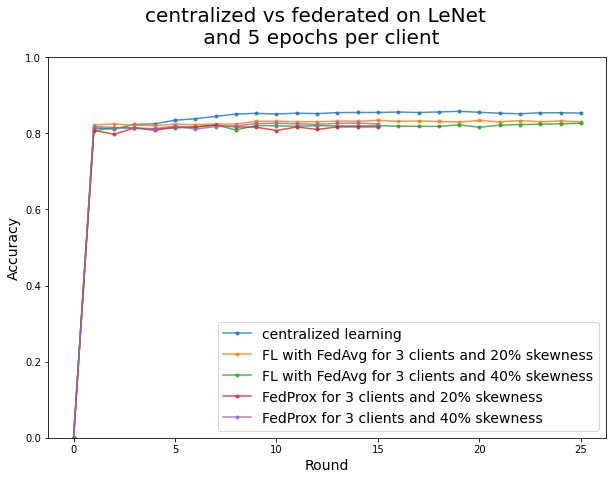

In [19]:
acc_dic3 ={"centralized learning" : np.genfromtxt('centralised_acc&loss_for_lenet_with_1_clients_202.csv',delimiter=',')[1,:],
          "FL with FedAvg for 3 clients and 20% skewness": np.genfromtxt('fedavg_acc&loss_for_lenet_with_3_clients_202.csv',delimiter=',')[1,:],
          "FL with FedAvg for 3 clients and 40% skewness": np.genfromtxt('fedavg_acc&loss_for_lenet_with_3_clients_402.csv',delimiter=',')[1,:],
         "FedProx for 3 clients and 20% skewness": np.genfromtxt('FedProx_acc&loss_for_lenet_with_3_clients_20_clientsepox_5_vsplit_0.2_lr_0.001_ce_5.csv',delimiter=',')[1,:],
          "FedProx for 3 clients and 40% skewness": np.genfromtxt('FedProx_acc&loss_for_lenet_with_3_clients_40_clientsepox_5_vsplit_0.2_lr_0.001_ce_5.csv',delimiter=',')[1,:]}
    
plot_acc_curves(acc_dic3,'centralized vs federated on LeNet \n and 5 epochs per client')

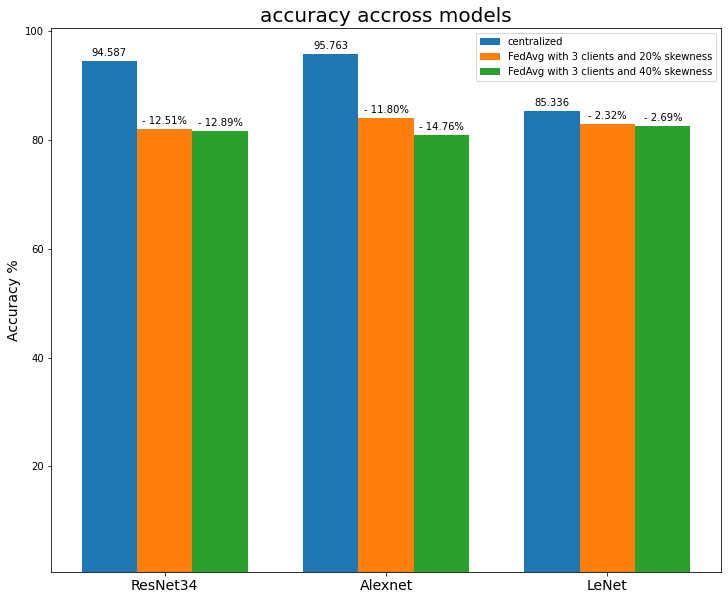

In [6]:
def bar_plot_acc(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='centralized')
    rects2 = ax.bar(x , fl1, width, label='FedAvg with 3 clients and 20% skewness')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg with 3 clients and 40% skewness')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy %',fontsize=14)
    ax.set_title('accuracy accross models',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:0.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel(rects1)
    def autolabel2(rectcent, rects):
        for reo, rect in zip(rectcent, rects):
            height_dif = reo.get_height() - rect.get_height()
            height = rect.get_height()
            ax.annotate('- {:0.2f}%'.format(height_dif),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel2(rects1, rects2)
    autolabel2(rects1, rects3)

    _=plt.show()


cen = [list(acc_dic.values())[0][24]*100,list(acc_dic2.values())[0][24]*100,list(acc_dic3.values())[0][24]*100] 
fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
fl2 = [list(acc_dic.values())[2][24]*100,list(acc_dic2.values())[2][24]*100,list(acc_dic3.values())[2][24]*100]


labels = ['ResNet34', 'Alexnet', 'LeNet']
    
bar_plot_acc(labels, cen, fl1, fl2)    



# Skewness on less comon labels:




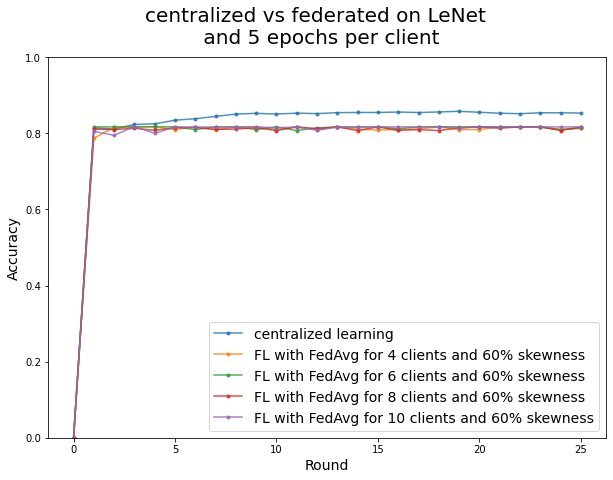

In [20]:
acc_dic4 ={"centralized learning" : np.genfromtxt('centralised_acc&loss_for_lenet_with_1_clients_202.csv',delimiter=',')[1,:],
          "FL with FedAvg for 4 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_4_clients_602.csv',delimiter=',')[1,:],
          "FL with FedAvg for 6 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_602.csv',delimiter=',')[1,:],
        "FL with FedAvg for 8 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_8_clients_602.csv',delimiter=',')[1,:],
        "FL with FedAvg for 10 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_10_clients_602.csv',delimiter=',')[1,:]}
    
plot_acc_curves(acc_dic4,'centralized vs federated on LeNet \n and 5 epochs per client')#,.7,.9)

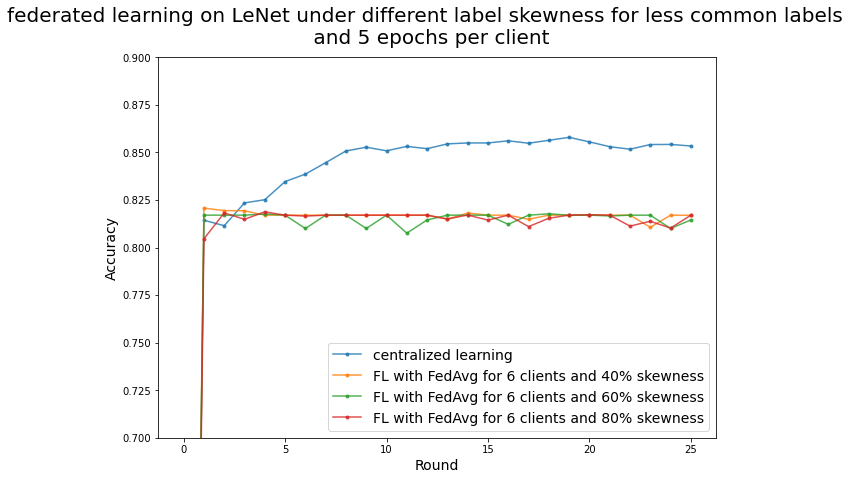

In [8]:
acc_dic5 ={"centralized learning" : np.genfromtxt('centralised_acc&loss_for_lenet_with_1_clients_202.csv',delimiter=',')[1,:],
          "FL with FedAvg for 6 clients and 40% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_402.csv',delimiter=',')[1,:],
          "FL with FedAvg for 6 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_602.csv',delimiter=',')[1,:],
        "FL with FedAvg for 6 clients and 80% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_802.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic5,'federated learning on LeNet under different label skewness for less common labels \n and 5 epochs per client',.7,.9)

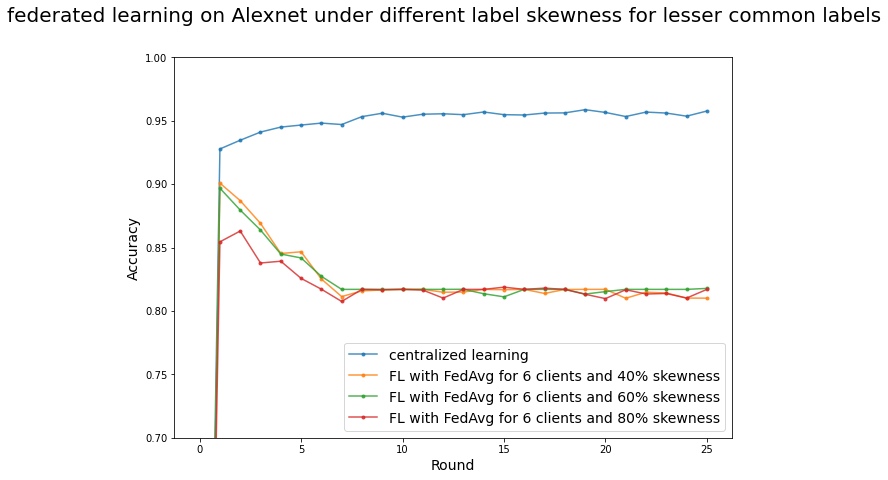

In [9]:
acc_dic5 ={"centralized learning" : np.genfromtxt('centralised_acc&loss_for_alexnet_with_1_clients_202.csv',delimiter=',')[1,:],
          "FL with FedAvg for 6 clients and 40% skewness": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_6_clients_402.csv',delimiter=',')[1,:],
          "FL with FedAvg for 6 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_6_clients_602.csv',delimiter=',')[1,:],
        "FL with FedAvg for 6 clients and 80% skewness": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_6_clients_802.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic5,'federated learning on Alexnet under different label skewness for lesser common labels',.7)

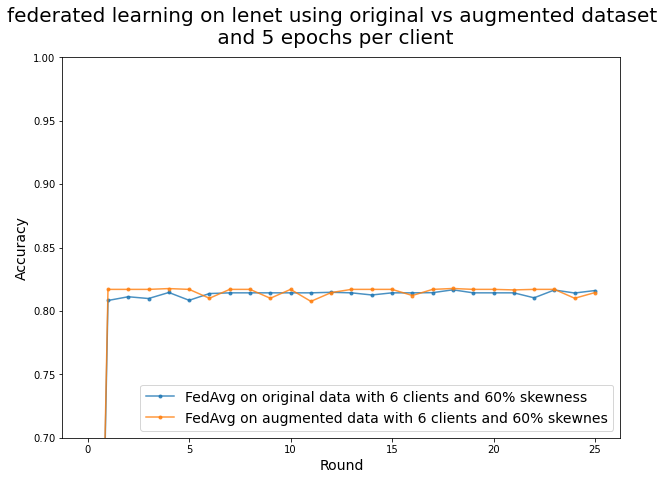

In [10]:
acc_dic6 ={
          "FedAvg on original data with 6 clients and 60% skewness": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_60_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedAvg on augmented data with 6 clients and 60% skewnes": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_602.csv',delimiter=',')[1,:]} 
plot_acc_curves(acc_dic6,'federated learning on lenet using original vs augmented dataset\n and 5 epochs per client',.7)

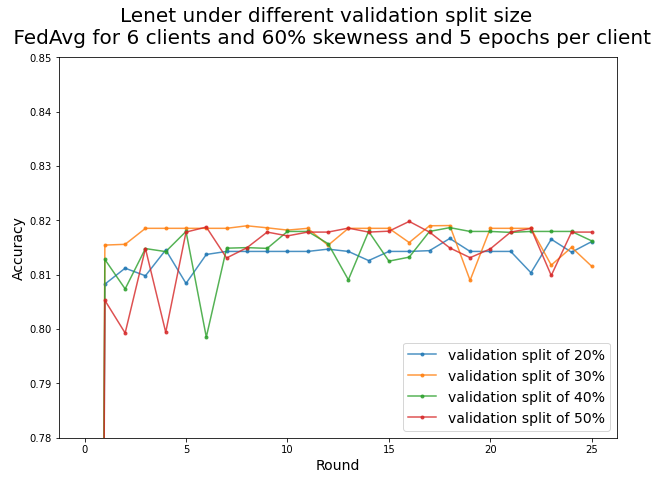

In [11]:


acc_dic7 ={"validation split of 20%" : np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_60_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "validation split of 30%": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_60_vsplit_0.3_lr_0.001.csv',delimiter=',')[1,:],
          "validation split of 40%": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_60_vsplit_0.4_lr_0.001.csv',delimiter=',')[1,:],
        "validation split of 50%": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_60_vsplit_0.5_lr_0.001.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic7,'Lenet under different validation split size \n FedAvg for 6 clients and 60% skewness and 5 epochs per client',.78,.85)

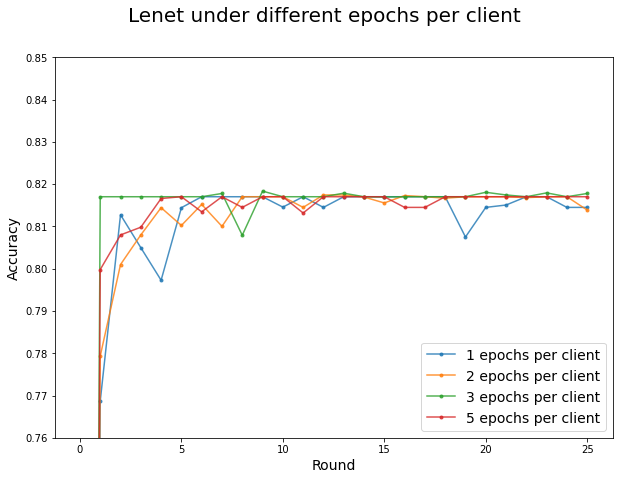

In [12]:

acc_dic8 ={"1 epochs per client" : np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_1_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "2 epochs per client": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
           "3 epochs per client": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_3_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "5 epochs per client": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_5_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic8,'Lenet under different epochs per client',.76,.85)

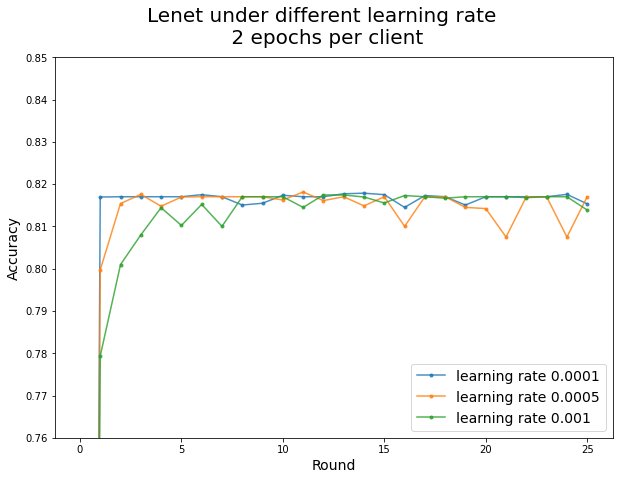

In [13]:


acc_dic9 ={"learning rate 0.0001" : np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.0001.csv',delimiter=',')[1,:],
          "learning rate 0.0005": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.0005.csv',delimiter=',')[1,:],
          "learning rate 0.001": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic9,'Lenet under different learning rate \n 2 epochs per client',.76,.85)

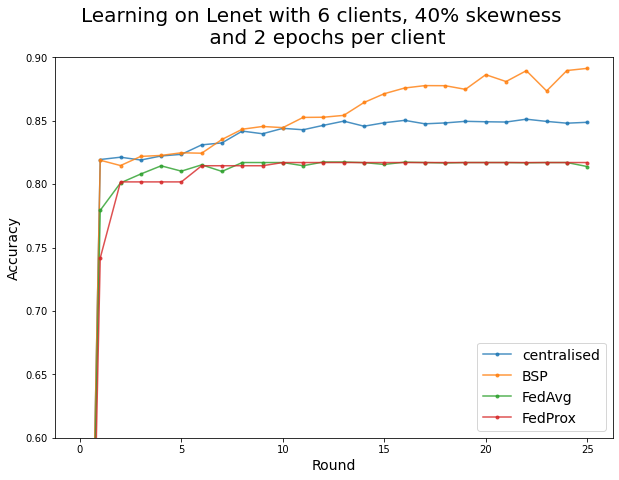

In [22]:

acc_dic_n1 ={"centralised" : np.genfromtxt('centralised_acc&loss_for_lenet_with_1_clients_40_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
    "BSP" : np.genfromtxt('BSP_acc&loss_for_lenet_with_6_clients_40_clientsepox_5_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedAvg": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedProx": np.genfromtxt('FedProx_acc&loss_for_lenet_with_6_clients_40_clientsepox_1_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic_n1,'Learning on Lenet with 6 clients, 40% skewness \n and 2 epochs per client',0.6,.9)

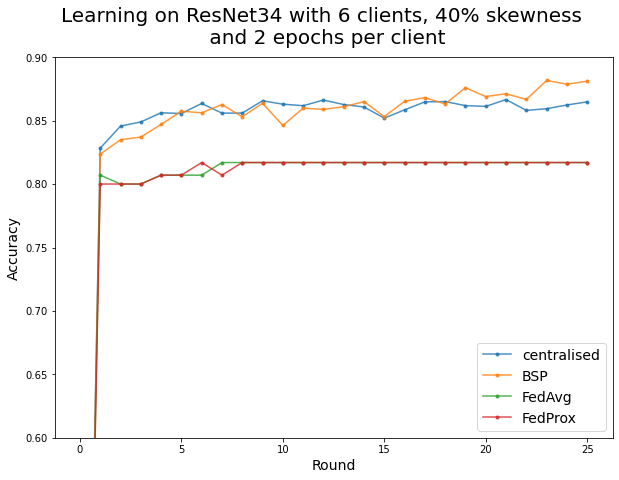

In [23]:

acc_dic_n2 ={"centralised" : np.genfromtxt('centralised_acc&loss_for_resnet34_with_1_clients_40_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
    "BSP" : np.genfromtxt('BSP_acc&loss_for_resnet34_with_6_clients_40_clientsepox_5_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedAvg": np.genfromtxt('FedAvg_acc&loss_for_resnet34_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedProx": np.genfromtxt('FedProx_acc&loss_for_resnet34_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic_n2,'Learning on ResNet34 with 6 clients, 40% skewness \n and 2 epochs per client',.6,.9)

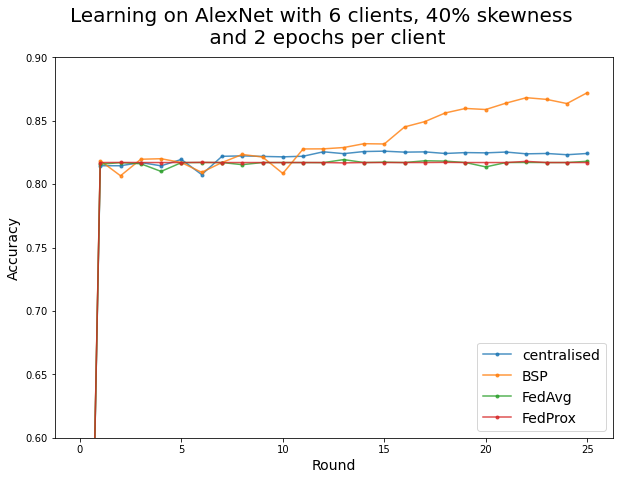

In [24]:

acc_dic_n3 ={"centralised" : np.genfromtxt('centralised_acc&loss_for_alexnet_with_1_clients_40_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
    "BSP" : np.genfromtxt('BSP_acc&loss_for_alexnet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedAvg": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedProx": np.genfromtxt('FedProx_acc&loss_for_alexnet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic_n3,'Learning on AlexNet with 6 clients, 40% skewness \n and 2 epochs per client',.6,.9)

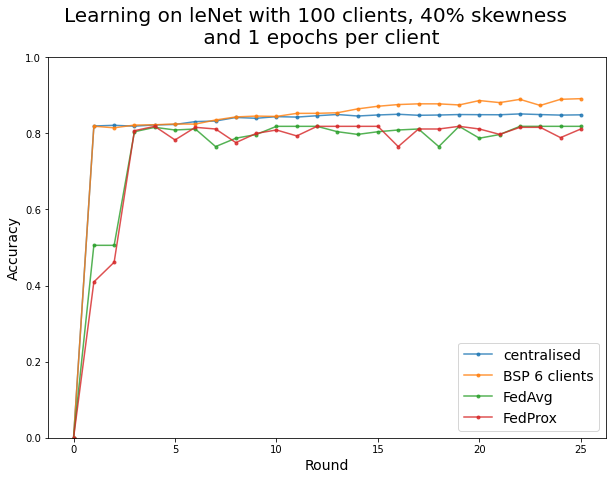

In [26]:
acc_dic_n100_lenet = {"centralised" : np.genfromtxt('previous_results/centralised_acc&loss_for_lenet_with_1_clients_40_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
                "BSP 6 clients" : np.genfromtxt('previous_results/BSP_acc&loss_for_lenet_with_6_clients_40_clientsepox_5_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
                "FedAvg": np.genfromtxt('FedAvg_acc&loss_for_lenet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613413631.1314447.csv',delimiter=',')[1,:],
          "FedProx": np.genfromtxt('FedProx_acc&loss_for_lenet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613409873.364998.csv',delimiter=',')[1,:]}    

plot_acc_curves(acc_dic_n100_lenet,'Learning on leNet with 100 clients, 40% skewness \n and 1 epochs per client',.0,1.0)

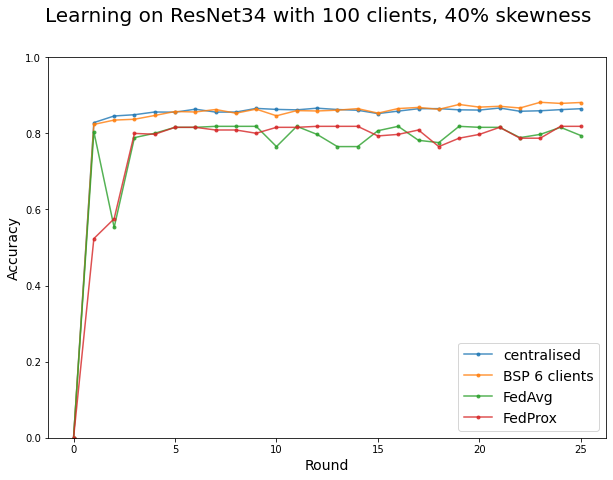

In [32]:
acc_dic_n100_resnet ={"centralised" : np.genfromtxt('previous_results/centralised_acc&loss_for_resnet34_with_1_clients_40_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
    "BSP 6 clients" : np.genfromtxt('previous_results/BSP_acc&loss_for_resnet34_with_6_clients_40_clientsepox_5_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
          "FedAvg": np.genfromtxt('FedAvg_acc&loss_for_resnet34_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613411266.2724059.csv',delimiter=',')[1,:],
          "FedProx": np.genfromtxt('FedProx_acc&loss_for_resnet34_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613407379.4135897.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic_n100_resnet,'Learning on ResNet34 with 100 clients, 40% skewness',0,1.0)

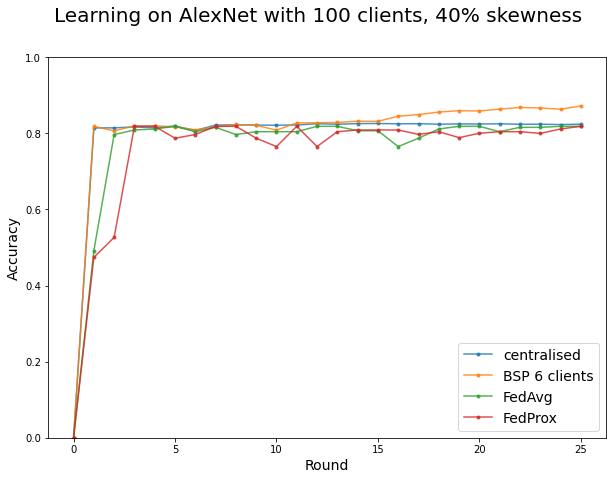

In [33]:
acc_dic_n100 = {"centralised" : np.genfromtxt('previous_results/centralised_acc&loss_for_alexnet_with_1_clients_40_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
                "BSP 6 clients" : np.genfromtxt('previous_results/BSP_acc&loss_for_alexnet_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
                "FedAvg": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613412259.8856387.csv',delimiter=',')[1,:],
          "FedProx": np.genfromtxt('FedProx_acc&loss_for_alexnet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613408830.5948892.csv',delimiter=',')[1,:]}    

plot_acc_curves(acc_dic_n100,'Learning on AlexNet with 100 clients, 40% skewness',.0,1.0)

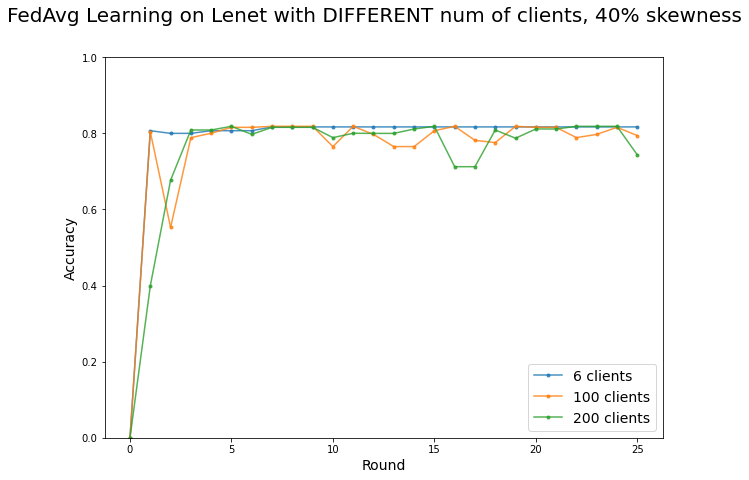

In [34]:
acc_dic_lenet_clients ={"6 clients" : np.genfromtxt('previous_results/FedAvg_acc&loss_for_resnet34_with_6_clients_40_clientsepox_2_vsplit_0.2_lr_0.001.csv',delimiter=',')[1,:],
    "100 clients": np.genfromtxt('FedAvg_acc&loss_for_resnet34_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613411266.2724059.csv',delimiter=',')[1,:],
          "200 clients": np.genfromtxt('FedAvg_acc&loss_for_resnet34_with_200_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613419655.5386474.csv',delimiter=',')[1,:]}    
plot_acc_curves(acc_dic_lenet_clients,'FedAvg Learning on Lenet with DIFFERENT num of clients, 40% skewness',.0,1)

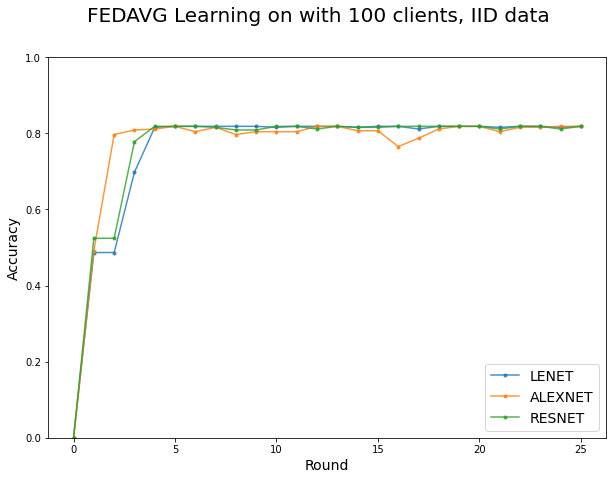

In [36]:
acc_dic_n100_s0 = {"LENET" : np.genfromtxt('FedAvg_acc&loss_for_lenet_with_100_clients_0_clientsepox_1_vsplit_0.3_lr_0.001_1613417028.2045393.csv',delimiter=',')[1,:],
                "ALEXNET": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613412259.8856387.csv',delimiter=',')[1,:],
          "RESNET": np.genfromtxt('FedAvg_acc&loss_for_resnet34_with_100_clients_0_clientsepox_1_vsplit_0.3_lr_0.001_1613415181.4715083.csv',delimiter=',')[1,:]}    

plot_acc_curves(acc_dic_n100_s0,'FEDAVG Learning on with 100 clients, IID data',.0,1.0)

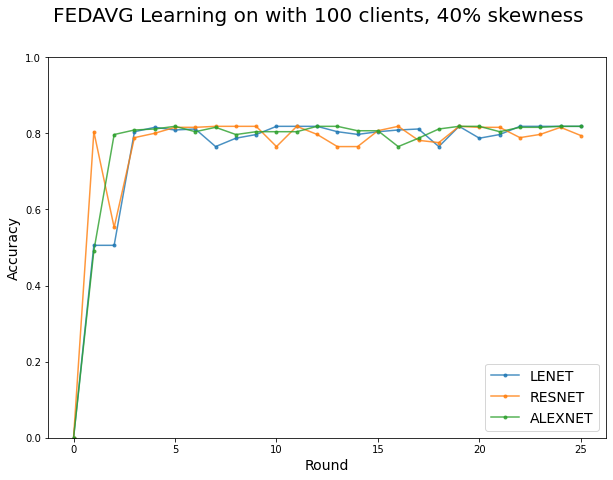

In [37]:
acc_dic_n100_s40 = {"LENET" : np.genfromtxt('FedAvg_acc&loss_for_lenet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613413631.1314447.csv',delimiter=',')[1,:],
                "RESNET": np.genfromtxt('FedAvg_acc&loss_for_resnet34_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613411266.2724059.csv',delimiter=',')[1,:],
          "ALEXNET": np.genfromtxt('FedAvg_acc&loss_for_alexnet_with_100_clients_40_clientsepox_1_vsplit_0.3_lr_0.001_1613412259.8856387.csv',delimiter=',')[1,:]}    

plot_acc_curves(acc_dic_n100_s40,'FEDAVG Learning on with 100 clients, 40% skewness',.0,1.0)

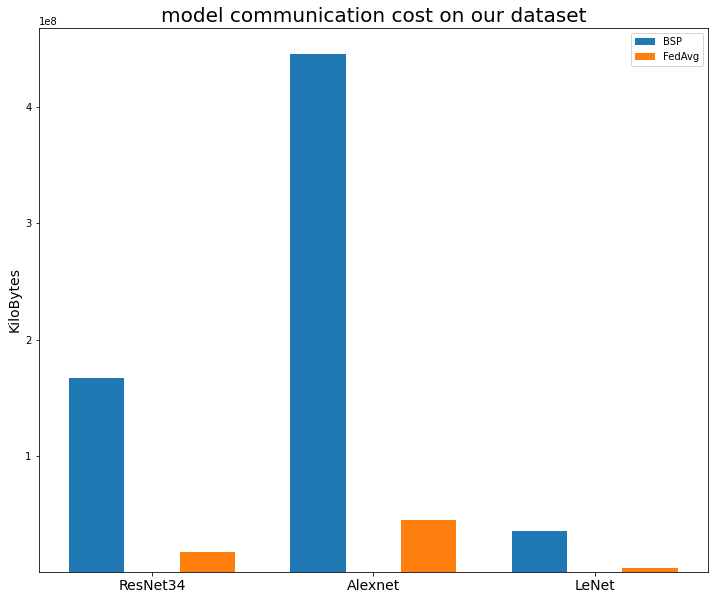

In [17]:
def bar_plot_comumication(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='BSP')
    #rects2 = ax.bar(x , fl1, width, label='FedAvg with 3 clients and 20% skewness')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('KiloBytes',fontsize=14)
    ax.set_title('model communication cost on our dataset',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    

    _=plt.show()


ep = 25
cln = 6
frackl = 4
btchnr = 1000
cen = [83332*btchnr*2,222954*btchnr*2,17587*btchnr*2] 
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
fl2 = [83332*frackl*ep*2,222954*frackl*ep*2,17587*frackl*ep*2]


labels = ['ResNet34', 'Alexnet', 'LeNet']
    
bar_plot_comumication(labels, cen, fl1, fl2)    